In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [34]:
data = pd.read_csv("Datasets/Student_Performance.csv")  # reading the data

In [35]:
data.info()  # print the columns that the data has

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [36]:
print(data) # print the data

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

In [37]:
data = data.drop_duplicates()  #drop the duplicate values if it exists

In [38]:
# Define features and Target

X = data[["Hours Studied", 
          "Previous Scores", 
          "Sleep Hours"]]

y = data["Performance Index"]

In [39]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )  

In [40]:
# Train Model

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
# Take user input
print("\nEnter Student Details for Prediction:\n")

hours = float(input("Enter Hours Studied: "))
previous = float(input("Enter Previous Score: "))
sleep = float(input("Enter Sleep Hours: "))


Enter Student Details for Prediction:



Enter Hours Studied:  7
Enter Previous Score:  80
Enter Sleep Hours:  8


In [42]:
# Convert input into DataFrame

new_data = pd.DataFrame(
    [[hours, previous, sleep]],
    columns=["Hours Studied", "Previous Scores", "Sleep Hours"]
)

In [43]:
# Predict

prediction = model.predict(new_data)

print("\nPredicted Performance Index:", round(prediction[0], 3))


Predicted Performance Index: 72.384


<h3> Performance Evaluation </h3>

In [44]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

# Checking Overfitting
train_pred = model.predict(X_train)

print("\nTrain R2:", r2_score(y_train, train_pred))
print("Test R2:", r2_score(y_test, y_pred))

R2 Score: 0.9870234434085109
MSE: 4.829416726921869
RMSE: 2.197593394357079

Train R2: 0.9877091171980548
Test R2: 0.9870234434085109


<h2> Plotting Graph</h2>

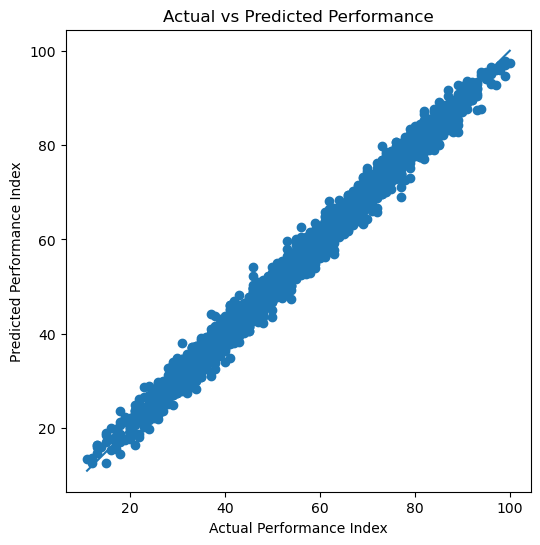

In [45]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])


plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance")

plt.show()

Since My R² is 0.98, points is tightly clustered around the line.